In [129]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
##leemos el csv y la variable datos y lo filtramos para que la comuna '-' no aparezca
datos=pd.read_csv('data/BIPComuna_std.csv')
datos=datos[datos.Comuna != '-']

##leemos el segundo csv y con un for de data1.index recorremos toda la columna del dataframe para realizar un filtro 
##y sumar los valores en los contadores correspondientes
cont=0
cont2=0
data1=pd.read_csv('data/BIPTotal_std.csv')
for filtro in data1.index:
    if '2019' in data1.loc[filtro,'Fecha']:
        cont=data1['Transacciones']+cont
    else:
        cont2=data1['Transacciones']+cont2

In [131]:
##verificamos el contenido de csv 1
datos

,Comuna,Codigo comuna,Transacciones,Fecha
0,Cerrillos,13102.0,18365.0,2020-03-01
1,Cerrillos,13102.0,55826.0,2020-03-02
2,Cerrillos,13102.0,57927.0,2020-03-03
3,Cerrillos,13102.0,58642.0,2020-03-04
4,Cerrillos,13102.0,57773.0,2020-03-05
...,...,...,...,...
2549,Vitacura,13132.0,8619.0,2020-05-11
2550,Vitacura,13132.0,8026.0,2020-05-12
2551,Vitacura,13132.0,7974.0,2020-05-13
2552,Vitacura,13132.0,8362.0,2020-05-14


In [132]:
##verificamos el contenido del csv 2
data1

,Fecha,Transacciones
0,2019-01-01,973244
1,2019-01-02,4516314
2,2019-01-03,4828483
3,2019-01-04,4928740
4,2019-01-05,2666538
...,...,...
496,2020-05-11,816363
497,2020-05-12,791922
498,2020-05-13,792389
499,2020-05-14,815803


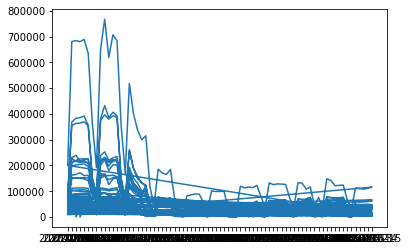

In [133]:
##graficamos la cantidad de transacciones por fecha y por comuna
plt.plot(datos['Fecha'],datos['Transacciones'])
plt.show()

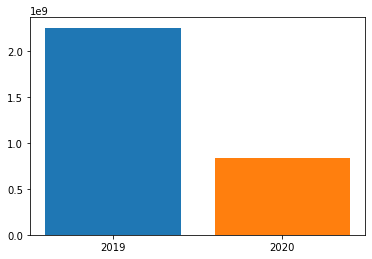

In [134]:
##graficamos la suma de las transacciones de cada año
plt.bar('2019',cont)
plt.bar('2020',cont2)
plt.show()

<AxesSubplot:xlabel='Fecha', ylabel='Transacciones'>

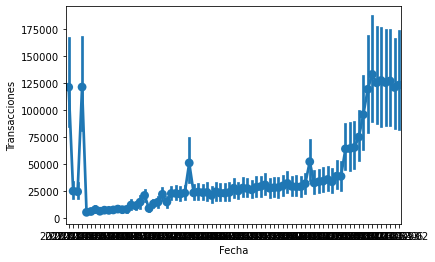

In [135]:
##imprimimos el grafico aplicando seaborn
sns.pointplot(data = datos.groupby(['Transacciones', 'Fecha']).mean().reset_index(), 
              x='Fecha', y='Transacciones')

C:\Users\CristopherHerrera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


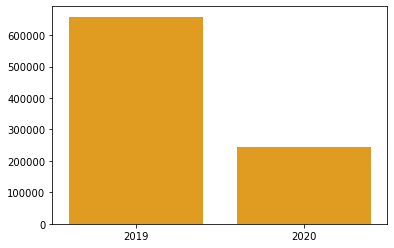

In [136]:
##se guarda los años en una variable y la suma de los datos de cada año para luego implementarlos en seaborn y se divide
##la suma en un millon para que el lector pueda entender mejor las cifras
Años=['2019','2020']
Transacciones=[int(cont.sum()/1000000),int(cont2.sum()/1000000)]
sns.barplot(Años,Transacciones,color="Orange")
plt.show()